In [1]:
# Meat Consumption
# based off FAOSTAT: Food Balance: Food Balance Sheets: Domestic Supply Qty (Unit 1000 Tonnes)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import io


In [2]:
# Set FAO stardand url parametrs
fao_area = 'area=' + '5000%3E' # All countries
fao_year = '&year=' + '%2C'.join(np.arange(1961,2019).astype(str))
fao_area_cs = '&area_cs=FAO'
fao_item_cs = '&item_cs=FAO'
fao_tail = '&show_codes=true&show_unit=true&show_flags=true&null_values=false&output_type=csv'

In [3]:
# FAO: Food Balance Sheets: Domestic Supply Qty in Tonnes
# Set url parametrs
fao_base_url = 'http://fenixservices.fao.org/faostat/api/v1/en/data/FBS?'
element_str = '2300' # Domestic supply quantity
fao_element = '&element=' + element_str
item_str = '2943' # Total Meat + (Total)
fao_item = '&item=' + item_str
# finalize fao url
fb_fao_url = fao_base_url + fao_area + fao_area_cs + fao_element + fao_item  + fao_item_cs + fao_year + fao_tail

# Request Get Data from FOA
response = requests.get(fb_fao_url)
decoded_content = response.content.decode('ISO-8859-1')
# Store CSV to DataFrame
fao_fb_df = pd.read_csv(io.BytesIO(response.content), encoding='ISO-8859-1')
fao_fb_df.head()

,Domain Code,Domain,Country Code,Country,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,FBS,Food Balance Sheets,2,Afghanistan,5301,Domestic supply quantity,2943,Meat,1961,1961,1000 tonnes,129,A,"Aggregate, may include official, semi-official..."
1,FBS,Food Balance Sheets,2,Afghanistan,5301,Domestic supply quantity,2943,Meat,1962,1962,1000 tonnes,132,A,"Aggregate, may include official, semi-official..."
2,FBS,Food Balance Sheets,2,Afghanistan,5301,Domestic supply quantity,2943,Meat,1963,1963,1000 tonnes,139,A,"Aggregate, may include official, semi-official..."
3,FBS,Food Balance Sheets,2,Afghanistan,5301,Domestic supply quantity,2943,Meat,1964,1964,1000 tonnes,144,A,"Aggregate, may include official, semi-official..."
4,FBS,Food Balance Sheets,2,Afghanistan,5301,Domestic supply quantity,2943,Meat,1965,1965,1000 tonnes,150,A,"Aggregate, may include official, semi-official..."


In [4]:
# Filter out Values = 0 & unnecessary columns 
fao_fb_df = fao_fb_df[fao_fb_df['Value'] > 0]
fao_fb_df = fao_fb_df[['Country Code','Country', 'Year', 'Value', 'Unit']]
fao_fb_df.head()

,Country Code,Country,Year,Value,Unit
0,2,Afghanistan,1961,129,1000 tonnes
1,2,Afghanistan,1962,132,1000 tonnes
2,2,Afghanistan,1963,139,1000 tonnes
3,2,Afghanistan,1964,144,1000 tonnes
4,2,Afghanistan,1965,150,1000 tonnes


In [5]:
# store top, middle, bottom countries in country_list base off 2013
fao_fb2013_df = fao_fb_df[fao_fb_df['Year'] == 2013]
grouped_fao_fb_df = fao_fb2013_df.groupby(['Country'])
sorted_dsq_meat = grouped_fao_fb_df.sum()['Value'].sort_values(ascending=False)
sorted_dsq_meat.head()

Country
China, mainland             84615
United States of America    36860
Brazil                      19552
Russian Federation          10726
Mexico                       7613
Name: Value, dtype: int64

In [6]:
# store top 5, middle 2, bottom 2 countries in country_list base off 2013
country_total = sorted_dsq_meat.count()
country_obs_list = [sorted_dsq_meat.index[i] for i in range(5)]
country_obs_values = [sorted_dsq_meat.values[i] for i in range(5)]
# Middle 2
for i in range(0,2):
    country_obs_list.append(sorted_dsq_meat.index[int(country_total/2)+i])
    country_obs_values.append(sorted_dsq_meat.values[int(country_total/2)+i])
# Bottom 2
country_obs_list.append(sorted_dsq_meat.index[-2])
country_obs_values.append(sorted_dsq_meat.values[-2])
country_obs_list.append(sorted_dsq_meat.index[-1])
country_obs_values.append(sorted_dsq_meat.values[-1])
print (country_obs_list, country_obs_values)

['China, mainland', 'United States of America', 'Brazil', 'Russian Federation', 'Mexico', 'Panama', 'Azerbaijan', 'Kiribati', 'Sao Tome and Principe'] [84615, 36860, 19552, 10726, 7613, 302, 299, 4, 3]


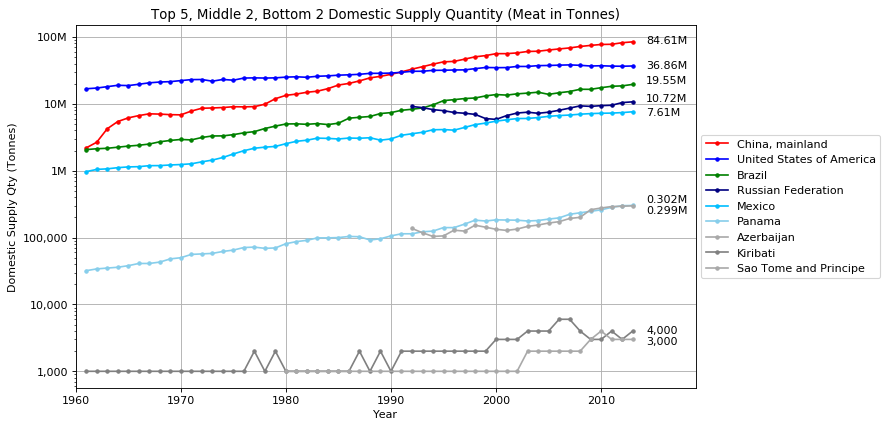

In [8]:
# Generate the Plot
#fig, ax = plt.subplots(figsize=(10,6))
fig = plt.figure(num=None, figsize=(10, 6), dpi=80)
ax = plt.gca()
#x_axis = np.arange(1961,2014)
#markers = ['o', '+', '^', 's', 'v', 'd', 'x', '<', '>', '*']
colors = ['red', 'blue', 'green', 'navy', 'deepskyblue', 'skyblue', 'darkgrey', 'grey', 'darkgrey']

# Loops through observe countries to plot
i = 0
for country in country_obs_list:
    country_df = fao_fb_df[fao_fb_df['Country'] == country]
    x_axis = country_df['Year']
    y_axis = country_df['Value']
    ax.plot(x_axis, y_axis, label=country, linestyle='solid', marker='.', color=colors[i])
    i += 1

ax.set_yscale('log')
    
# Labels
plt.title("Top 5, Middle 2, Bottom 2 Domestic Supply Quantity (Meat in Tonnes)")
plt.xlabel("Year")
plt.xlim(1960,2019)
plt.ylabel("Domestic Supply Qty (Tonnes)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.yticks([10**x for x in range(6)], ['1,000', '10,000', '100,000', '1M', '10M', '100M'])
plt.grid()

plt.text(0.92, 0.12,'3,000', transform=ax.transAxes)
plt.text(0.92, 0.15,'4,000', transform=ax.transAxes)
plt.text(0.92, 0.48,'0.299M', transform=ax.transAxes)
plt.text(0.92, 0.51,'0.302M', transform=ax.transAxes)
plt.text(0.92, 0.75,'7.61M', transform=ax.transAxes)
plt.text(0.92, 0.79,'10.72M', transform=ax.transAxes)
plt.text(0.92, 0.84,'19.55M', transform=ax.transAxes)
plt.text(0.92, 0.88,'36.86M', transform=ax.transAxes)
plt.text(0.92, 0.95,'84.61M', transform=ax.transAxes)

# Save the Figure
plt.savefig("img/DomesticSupplyQty.png", bbox_inches='tight', pad_inches=.2)
plt.show()